# <font color='#31394d'>Linear Regression Practice Exercises</font>


<!-- For this exercise, we'll be using the carseats dataset that is provided as a csv file in the `data` folder. -->

<!-- We will attempt to predict child car seat sales (the `Sales` variable) based on a number of predictors using data from 400 different locations. The dataset includes qualitative predictors such as `Shelveloc`, an indicator of the quality of the shelving location; that is, the space within each store in which the car seat is displayed. The predictor `Shelveloc` takes on three possible values: Bad, Medium, and Good. `US` and `Urban` are also categorical (binary) features. -->

🚀 <font color='#d9c4b1'> Exercise: </font> Import and examine the data. Don't forget to import the necessary packages!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/carseats.csv")

In [3]:
data.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
75,8.55,88,111,23,480,92,Bad,36,16,No,Yes
291,6.64,118,70,0,106,89,Bad,39,17,Yes,No
143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes
161,2.93,143,21,5,81,160,Medium,67,12,No,Yes
132,9.54,125,87,9,232,136,Good,72,10,Yes,Yes
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes
77,7.70,118,71,12,44,89,Medium,67,18,No,Yes
69,7.99,127,59,0,339,99,Medium,65,12,Yes,No
91,4.81,97,46,11,267,107,Medium,80,15,Yes,Yes
221,6.43,124,44,0,125,107,Medium,80,11,Yes,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.duplicated().sum()

0

#### Observations
- The data has no null values.
- There are 8 numeric features and 3 categorical features.

Now let's do some basic exploratory data analysis.

🚀 <font color='#d9c4b1'> Exercise: </font> Determine which columns are numerical and examine their distributions. Look for outliers. Can you see any strong relationships, particularly with the `Sales` outcome?

### Numeric Features

In [7]:
numeric=data.select_dtypes(include=['float64', 'int64'])
numeric.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
7,11.85,136,81,15,425,120,67,10
353,9.45,107,67,12,430,92,35,12
288,6.98,116,40,0,74,97,76,15
392,4.53,129,42,13,315,130,34,13
34,2.67,115,54,0,406,128,42,17


In [8]:
corr=numeric.corr()
corr['Sales']

Sales          1.000000
CompPrice      0.064079
Income         0.151951
Advertising    0.269507
Population     0.050471
Price         -0.444951
Age           -0.231815
Education     -0.051955
Name: Sales, dtype: float64

In [9]:
numeric.skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [10]:
numeric.kurt()

Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

#### Observation
- `Price` has a strong negative correlation to `Sales`
- The numeric features are fairly symmetrical.

## Univariate Analysis  
### 1. Histogram

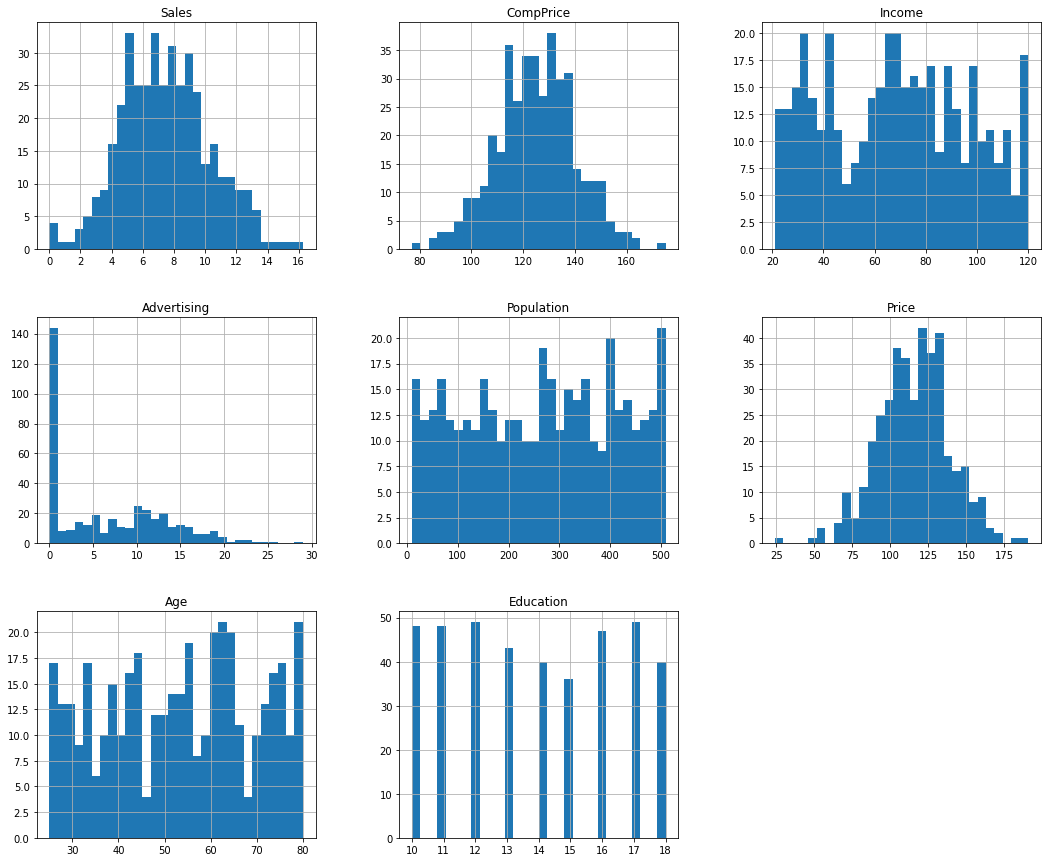

In [11]:
numeric.hist(bins=30,figsize=(18,15));

- `Sales`,`CompPrice` and `Price` have a normal distribution.
- `Advertising` is skewed to the right.

### 2. Boxplot

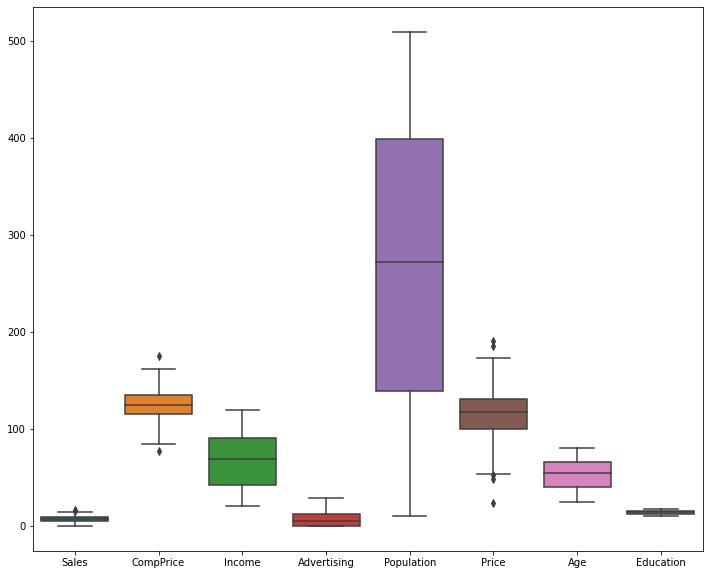

In [12]:
plt.figure(figsize=(12,10))
sns.boxplot( data = numeric);

## Bivariate Analysis  
### 1. Regplot

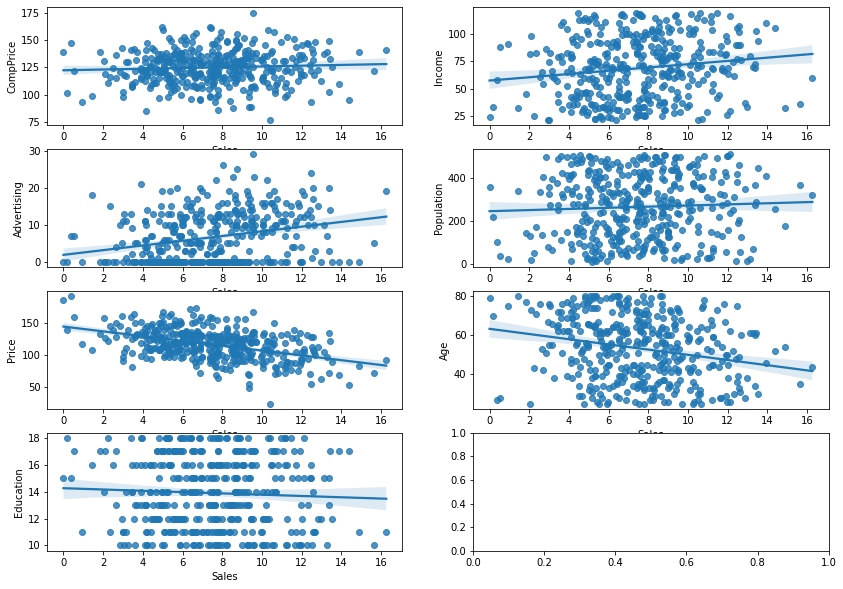

In [13]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(14,10))
sns.regplot(data=numeric, x='Sales',y= 'CompPrice',scatter= True, fit_reg=True, ax=ax1);
sns.regplot(data=numeric, x='Sales',y= 'Income',scatter= True, fit_reg=True, ax=ax2);
sns.regplot(data=numeric, x='Sales',y= 'Advertising',scatter= True, fit_reg=True, ax=ax3);
sns.regplot(data=numeric, x='Sales',y= 'Population',scatter= True, fit_reg=True, ax=ax4);
sns.regplot(data=numeric, x='Sales',y= 'Price',scatter= True, fit_reg=True, ax=ax5);
sns.regplot(data=numeric, x='Sales',y= 'Age',scatter= True, fit_reg=True, ax=ax6);
sns.regplot(data=numeric, x='Sales',y= 'Education',scatter= True, fit_reg=True, ax=ax7);


- `Sales`,`CompPrice` and `Price` have outliers

🚀 <font color='#d9c4b1'> Exercise: </font> For the categorical variables, check how many observations are in each category. How does carseat sales vary by category?

In [14]:
cat=data.select_dtypes(include=['object'])
cat.sample(5)

,ShelveLoc,Urban,US
211,Medium,Yes,Yes
231,Medium,No,No
238,Good,Yes,No
234,Good,No,Yes
269,Medium,Yes,No


## Univariate Analysis  
### 1. Countplot

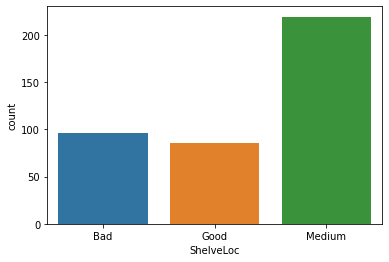

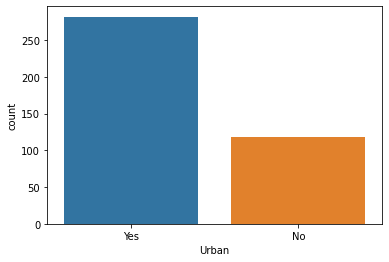

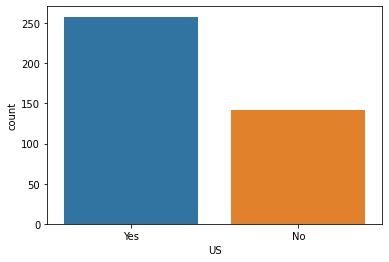

In [15]:
cat_list=['ShelveLoc','Urban','US']
for var in cat_list:
    plt.subplots()
    sns.countplot(x=cat[var])

## Bivariate Analysis  
### 1. Boxplot

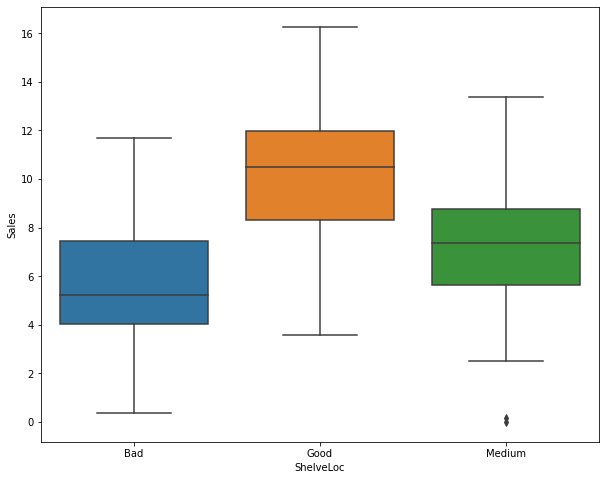

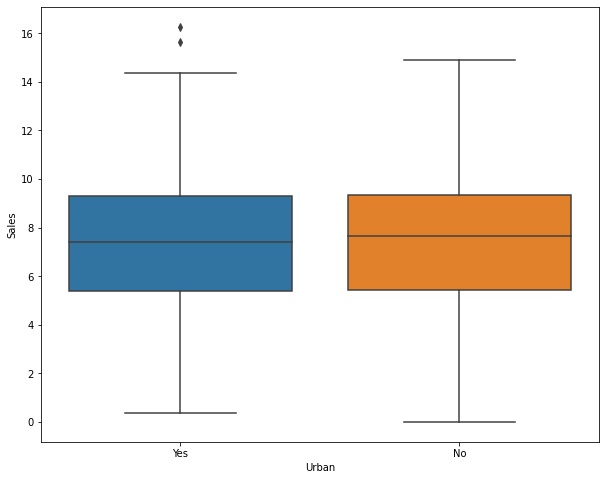

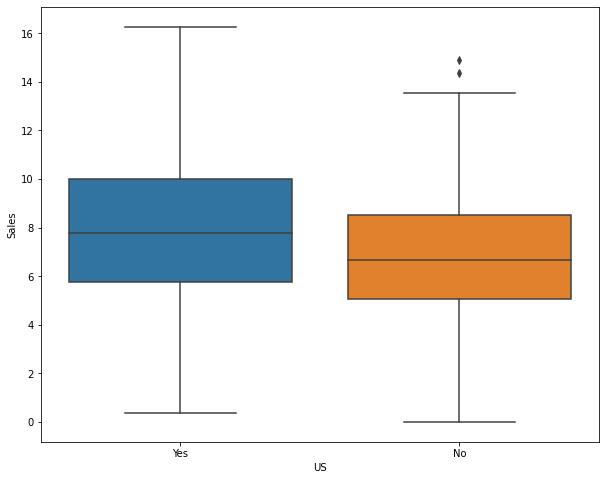

In [16]:
for var in cat_list:
    df= pd.concat([numeric['Sales'], cat[var]], axis=1)
    plt.subplots(figsize=(10, 8))
    fig = sns.boxplot(x=var, y="Sales", data=df)


<!-- To get ready to fit a linear regression model, we must first use one-hot encoding to convert our categorical variables into dummies. Read more about one-hot encoding here! https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/ -->

🚀 <font color='#d9c4b1'> Exercise: </font> Use the `pd.get_dummies` function to do this. If you don't know how to use this function, try looking at its help page with `?pd.get_dummies`. Don't forget to choose a reference category and omit this column from the dataset.

### Feature Engineering

I used Label Encoding to transform the categorical variables to numeric variables.

In [17]:
ShelveLoc_labels={'Bad':1,'Medium':2,'Good':3}
Urban_labels={'No': 0, 'Yes': 1}
US_labels={'No':0, 'Yes': 1}
cat['ShelveLoc_label']=cat['ShelveLoc'].map(ShelveLoc_labels)
cat['Urban_label']=cat['Urban'].map(Urban_labels)
cat['US_label']=cat['US'].map(US_labels)
cat.sample(10)


,ShelveLoc,Urban,US,ShelveLoc_label,Urban_label,US_label
258,Bad,No,No,1,0,0
155,Medium,Yes,No,2,1,0
173,Medium,Yes,Yes,2,1,1
299,Medium,No,Yes,2,0,1
23,Medium,Yes,No,2,1,0
187,Bad,Yes,No,1,1,0
273,Medium,Yes,Yes,2,1,1
115,Medium,Yes,No,2,1,0
387,Medium,No,Yes,2,0,1
28,Bad,Yes,Yes,1,1,1


In [18]:
cat_label=cat[['ShelveLoc_label','Urban_label','US_label']]
cat_label

,ShelveLoc_label,Urban_label,US_label
0,1,1,1
1,3,1,1
2,2,1,1
3,2,1,1
4,1,1,0
...,...,...,...
395,3,1,1
396,2,0,1
397,2,1,1
398,1,1,1


In [19]:
concat_data=pd.concat([numeric , cat_label], axis=1)
concat_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_label,Urban_label,US_label
0,9.50,138,73,11,276,120,42,17,1,1,1
1,11.22,111,48,16,260,83,65,10,3,1,1
2,10.06,113,35,10,269,80,59,12,2,1,1
3,7.40,117,100,4,466,97,55,14,2,1,1
4,4.15,141,64,3,340,128,38,13,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,3,1,1
396,6.14,139,23,3,37,120,55,11,2,0,1
397,7.41,162,26,12,368,159,40,18,2,1,1
398,5.94,100,79,7,284,95,50,12,1,1,1


In [20]:
corr=concat_data.corr()
corr.Sales.sort_values(ascending = False)

Sales              1.000000
ShelveLoc_label    0.554458
Advertising        0.269507
US_label           0.177093
Income             0.151951
CompPrice          0.064079
Population         0.050471
Urban_label       -0.015419
Education         -0.051955
Age               -0.231815
Price             -0.444951
Name: Sales, dtype: float64

#### Observation
- `ShelveLoc` and `Advertising` have a strong positive correlated with `Sales`
- `Price` and `Age` have a strong negative correlation with `Sales`

<!-- Great - all the columns are now numerical! We are ready to fit our first linear regression model. -->

<!-- Begin by importing the `LinearRegression` class. Inspect the help to see what parameters can be set when we instantiate an object of this class and what the default arguments are: -->

## Building the model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = LinearRegression()

<!-- Like all supervised learning methods in `sklearn`, the `model` object has a `fit` method for estimating the model parameters (using the training data) and a `predict` method for making predictions on new data (the test data). -->

🚀 <font color='#d9c4b1'> Exercise: </font> Train a linear model to predict `Sales` using all the other columns in this dataset; that is, estimate the $\beta$ parameters by minimising the RSS loss function on the training data. If you are not sure how to do this, try examining `?model.fit`.

In [22]:
from sklearn.model_selection import train_test_split
X = concat_data.drop('Sales', axis = 1)
Y = concat_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(320, 10)
(80, 10)
(320,)
(80,)


In [24]:
def regress(features):
    for val in features:
        print('The feature is '+ val)
        model.fit(X=X_train[[val]],y=y_train)
        y_hat = model.predict(X_test[[val]])
        print('The MSE is ', mean_squared_error(y_true=y_test, y_pred=y_hat))
        print('The MAE is ',mean_absolute_error(y_true=y_test, y_pred=y_hat))

In [25]:
features=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_label','Urban_label','US_label']
regress(features)

The feature is CompPrice
The MSE is  7.385163364263323
The MAE is  2.321257577750796
The feature is Income
The MSE is  7.736649315881323
The MAE is  2.32093527805005
The feature is Advertising
The MSE is  6.4338481226516135
The MAE is  2.116435648706493
The feature is Population
The MSE is  7.183702702127503
The MAE is  2.252553313114843
The feature is Price
The MSE is  5.1911261136601805
The MAE is  1.8683433821460596
The feature is Age
The MSE is  7.101229935464545
The MAE is  2.2727883287085953
The feature is Education
The MSE is  7.299697519662823
The MAE is  2.2848947621438898
The feature is ShelveLoc_label
The MSE is  5.2297016812706225
The MAE is  1.8803480625054487
The feature is Urban_label
The MSE is  7.241791276332009
The MAE is  2.2663850661886373
The feature is US_label
The MSE is  6.8963704633991725
The MAE is  2.219934544008484


#### Observations
- `ShelveLoc` and `Price` have the lowest MSE and MAE

In [26]:
model.fit(X=X_train, y=y_train)

LinearRegression()

🚀 <font color='#d9c4b1'> Exercise: </font> Interpret your regression coefficients. Do these correspond to the relationships that you discovered in your exploratory data analysis above?

In [27]:
model.coef_

array([ 9.14431331e-02,  1.63726507e-02,  1.18450663e-01,  4.59271290e-04,
       -9.39892727e-02, -4.81263135e-02, -2.64640900e-02,  2.46489969e+00,
        1.03019410e-01, -1.93210224e-01])

The coefficients match the relationship discovered during EDA. The negative coefficients represent the features have a negative correlation to `Sales` such as `Price` while the postive coefficients represent a positive correlation to `Sales` such as `ShelveLoc`

In [28]:
model.intercept_

3.083506722404958

🚀 <font color='#d9c4b1'> Exercise: </font> Plot the actual sales versus the predicted sales. Compute the coefficient of determination ($R^2$). Does this seem like a good model?

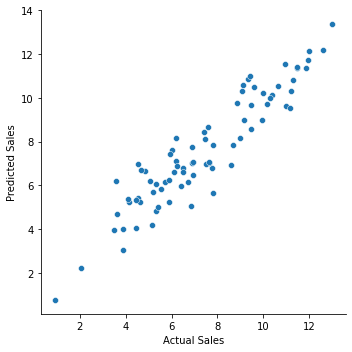

In [29]:
y_hat = model.predict(X_test)
sns.relplot(x=y_test, y=y_hat, kind="scatter")
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales');


🚀 <font color='#d9c4b1'> Exercise: </font> Use cross-validation to determine which model is best: the full model above or a simpler model that only includes price and shelf location as features.

## Model Selection using Cross Validation  
#### A. Full Model

In [30]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(estimator=model,X=X_train,y=y_train,scoring="neg_mean_squared_error", cv=8)
cv_scores

array([-1.52499053, -1.1299175 , -1.3322109 , -0.67870701, -1.03546703,
       -1.35202681, -1.1362866 , -1.10887842])

In [31]:
np.mean(cv_scores)

-1.162310599918037

#### B. Simple Model

In [32]:
cv_scores=cross_val_score(estimator=model,X=X_train[['ShelveLoc_label','Price']],y=y_train,scoring="neg_mean_squared_error", cv=8)
cv_scores

array([-4.4880893 , -3.4693854 , -3.72989074, -4.34130841, -3.93397354,
       -3.75770663, -4.07006993, -3.33417593])

In [33]:
np.mean(cv_scores)

-3.8905749862333785

The simple model has the least negative MSE value

### Improving the Simple Model
#### i) Adding an interaction effect

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you think that the relationship between sales and price is likely to differ depending on the shelf location. Add an interation effect to your simple model and see if it improves on model performance.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True)
array=poly.fit_transform(X_train[['ShelveLoc_label','Price']])
dataset=pd.DataFrame(array)
dataset

,0,1,2,3
0,1.0,3.0,128.0,384.0
1,1.0,2.0,122.0,244.0
2,1.0,2.0,99.0,198.0
3,1.0,2.0,99.0,198.0
4,1.0,2.0,129.0,258.0
...,...,...,...,...
315,1.0,2.0,124.0,248.0
316,1.0,2.0,119.0,238.0
317,1.0,3.0,99.0,297.0
318,1.0,2.0,120.0,240.0


In [35]:
cv_scores=cross_val_score(estimator=model,X=dataset,y=y_train,scoring="neg_mean_squared_error", cv=8)
cv_scores

array([-4.47202545, -3.46874222, -3.71966778, -4.3088857 , -3.95509882,
       -3.95936532, -4.0424181 , -3.30286149])

In [36]:
np.mean(cv_scores)

-3.903633109552723

#### ii) Adding a quadratic relationship to the interaction

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you suspect that there is a quadratic relationship between sales and price. (The exploratory analysis doesn't actually support this, but let's go ahead anyway!) Extend your simple model to include an quadratic term for price and determine if it improves model performance.

In [37]:
poly = PolynomialFeatures(degree=2)
array=poly.fit_transform(X_train[['ShelveLoc_label','Price']])
dataset=pd.DataFrame(array)
dataset

,0,1,2,3,4,5
0,1.0,3.0,128.0,9.0,384.0,16384.0
1,1.0,2.0,122.0,4.0,244.0,14884.0
2,1.0,2.0,99.0,4.0,198.0,9801.0
3,1.0,2.0,99.0,4.0,198.0,9801.0
4,1.0,2.0,129.0,4.0,258.0,16641.0
...,...,...,...,...,...,...
315,1.0,2.0,124.0,4.0,248.0,15376.0
316,1.0,2.0,119.0,4.0,238.0,14161.0
317,1.0,3.0,99.0,9.0,297.0,9801.0
318,1.0,2.0,120.0,4.0,240.0,14400.0


In [38]:
cv_scores=cross_val_score(estimator=model,X=dataset,y=y_train,scoring="neg_mean_squared_error", cv=8)
cv_scores

array([-4.21147128, -3.397105  , -4.01193088, -4.22937472, -3.80966253,
       -3.95050743, -3.90042835, -4.06806308])

In [39]:
np.mean(cv_scores)

-3.947317908432354

#### Conclusion
- The model performs better with the interaction between `Price` and `ShelveLoc` and it performs even better with the quadratic relationship between the features